In [1]:
# Amazon Stock Price Prediction - Coursework Solution
# 6BUIS017C CRM & CM With Business Intelligence

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# TASK A: Amazon Stock Price Prediction
# =============================================================================

# Download Amazon stock data for the last 5 years
print("Downloading Amazon stock data...")
amzn_data = yf.download('AMZN', period="5y")
print(f"Data downloaded: {len(amzn_data)} rows")
print("\nFirst few rows:")
print(amzn_data.head())


[*********************100%***********************]  1 of 1 completed

Data downloaded: 1256 rows

First few rows:
Price            Close        High         Low        Open    Volume
Ticker            AMZN        AMZN        AMZN        AMZN      AMZN
Date                                                                
2021-01-07  158.108002  160.427002  157.750000  157.850006  70290000
2021-01-08  159.134995  159.531998  157.110001  159.000000  70754000
2021-01-11  155.710495  157.819000  155.500000  157.400497  73668000
2021-01-12  156.041504  157.106995  154.300003  156.000000  70292000
2021-01-13  158.294495  159.497498  156.104004  156.421997  66424000



=== Task A(a): Data Visualization ===


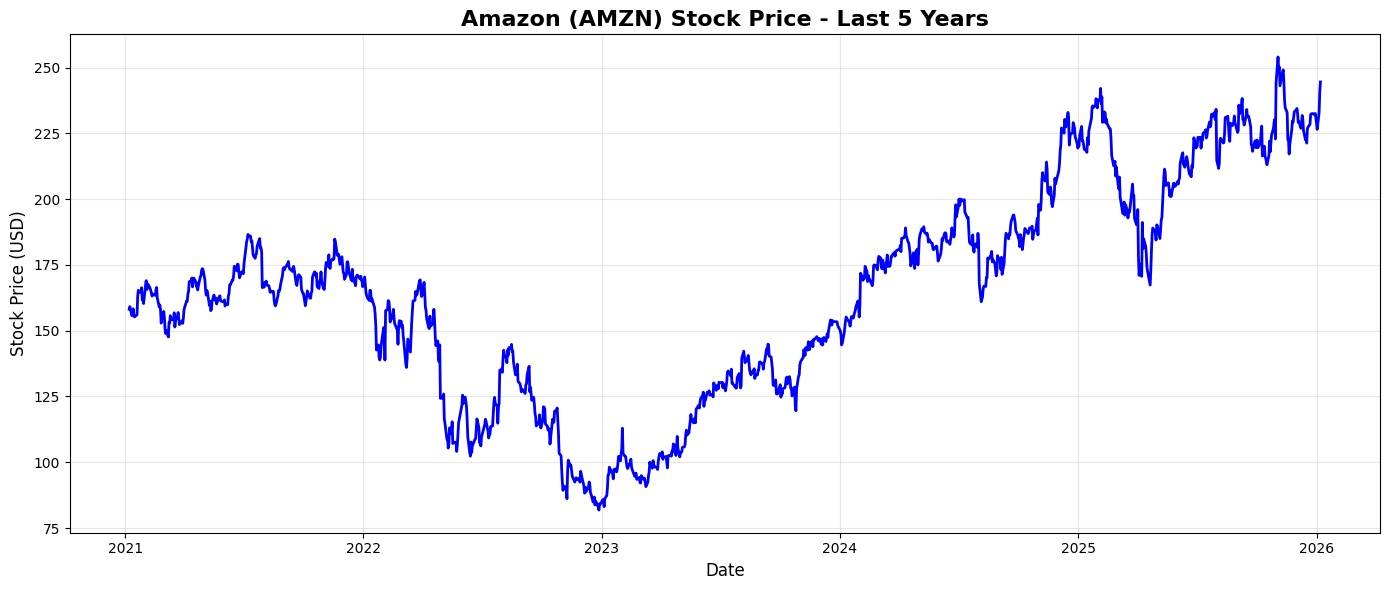

In [2]:
# -----------------------------------------------------------------------------
# a) DATA VISUALIZATION - Simple Line Chart
# -----------------------------------------------------------------------------
print("\n=== Task A(a): Data Visualization ===")

plt.figure(figsize=(14, 6))
plt.plot(amzn_data.index, amzn_data['Close'], linewidth=2, color='blue')
plt.title('Amazon (AMZN) Stock Price - Last 5 Years', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('amzn_price_chart.png', dpi=300)
plt.show()


In [3]:
# -----------------------------------------------------------------------------
# b) BUILD EXPLANATORY VARIABLES - Technical Indicators
# -----------------------------------------------------------------------------
print("\n=== Task A(b): Building Technical Indicators ===")

# Simple Moving Average - 20 days (MA20)
amzn_data['MA20'] = amzn_data['Close'].rolling(window=20).mean()
print("MA20 calculated - 20-day Simple Moving Average")

# Exponential Moving Average - 20 days (EMA20)
amzn_data['EMA20'] = amzn_data['Close'].ewm(span=20, adjust=False).mean()
print("EMA20 calculated - 20-day Exponential Moving Average")

# Simple Moving Average - 50 days (MA50)
amzn_data['MA50'] = amzn_data['Close'].rolling(window=50).mean()
print("MA50 calculated - 50-day Simple Moving Average")

# Relative Strength Index - 14 days (RSI)
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

amzn_data['RSI'] = calculate_rsi(amzn_data['Close'])
print("RSI calculated - 14-day Relative Strength Index")

# Remove rows with missing values
amzn_data = amzn_data.dropna()
print(f"\nData after removing missing values: {len(amzn_data)} rows")
print("\nTechnical Indicators Summary:")
print(amzn_data[['Close', 'MA20', 'EMA20', 'MA50', 'RSI']].describe())



=== Task A(b): Building Technical Indicators ===
MA20 calculated - 20-day Simple Moving Average
EMA20 calculated - 20-day Exponential Moving Average
MA50 calculated - 50-day Simple Moving Average
RSI calculated - 14-day Relative Strength Index

Data after removing missing values: 1207 rows

Technical Indicators Summary:
Price         Close         MA20        EMA20         MA50          RSI
Ticker         AMZN                                                    
count   1207.000000  1207.000000  1207.000000  1207.000000  1207.000000
mean     163.822554   163.201557   163.216611   162.333087    52.152203
std       41.329962    40.439319    40.251840    39.142583    15.925654
min       81.820000    86.325000    86.624242    90.546800    13.524372
25%      129.980003   130.882250   130.654164   131.635701    39.505733
50%      167.093506   166.614751   166.965496   166.069160    53.723473
75%      188.990005   187.506751   187.074352   187.105000    64.236021
max      254.000000   236.671

In [4]:
# -----------------------------------------------------------------------------
# c) DEFINE TRAIN AND TEST DATA
# -----------------------------------------------------------------------------
print("\n=== Task A(c): Train and Test Data Split ===")

# Set reproducible seed
np.random.seed(42)
print("Reproducible seed set to: 42")

# Prepare features and target
X = amzn_data[['MA20', 'MA50']]  # Features for Linear Regression
y = amzn_data['Close']  # Target variable

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing set size: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nTraining features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


=== Task A(c): Train and Test Data Split ===
Reproducible seed set to: 42
Training set size: 965 samples (80.0%)
Testing set size: 242 samples (20.0%)

Training features shape: (965, 2)
Testing features shape: (242, 2)
Training target shape: (965, 1)
Testing target shape: (242, 1)


In [5]:
# -----------------------------------------------------------------------------
# d) BUILD LINEAR REGRESSION MODEL
# -----------------------------------------------------------------------------
print("\n=== Task A(d): Linear Regression Model ===")

# Define the Linear Regression Model
lr_model = LinearRegression()
print("Linear Regression model initialized")

# Train the model
lr_model.fit(X_train, y_train)
print("Linear Regression model trained successfully")
print(f"Model coefficients: {lr_model.coef_}")
print(f"Model intercept: {lr_model.intercept_}")


=== Task A(d): Linear Regression Model ===
Linear Regression model initialized
Linear Regression model trained successfully
Model coefficients: [[ 1.24417223 -0.26013698]]
Model intercept: [3.07557784]



=== Task A(e): Model Testing and Visualization ===
Predictions made on test data

Linear Regression Model Performance:
Mean Squared Error (MSE): 56.93
Root Mean Squared Error (RMSE): 7.55
R-squared (R²): 0.9694
Mean Absolute Error (MAE): 5.76
Model Accuracy: 96.94%


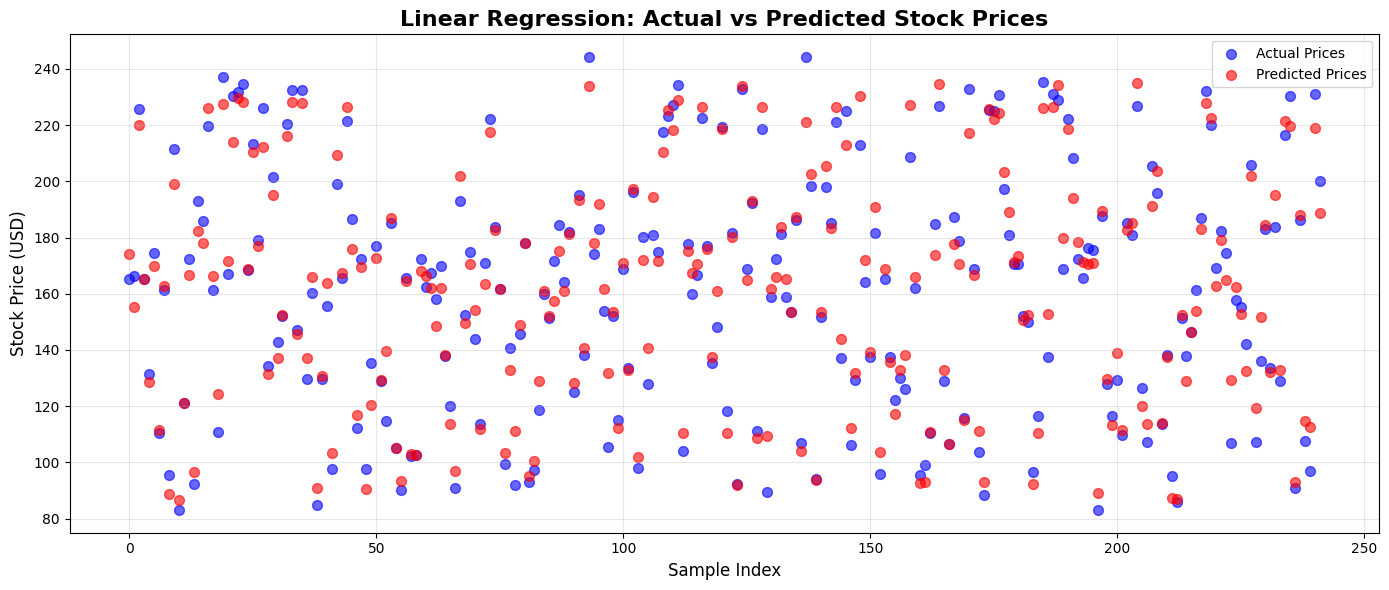

In [6]:
# -----------------------------------------------------------------------------
# e) PREDICTION FUNCTION AND RESULT
# -----------------------------------------------------------------------------
print("\n=== Task A(e): Model Testing and Visualization ===")

# Make predictions on test data
y_pred_lr = lr_model.predict(X_test)
print("Predictions made on test data")

# Calculate accuracy metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"\nLinear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R-squared (R²): {r2_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Model Accuracy: {r2_lr*100:.2f}%")

# Visualize predictions vs actual values
plt.figure(figsize=(14, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Prices', alpha=0.6, s=50)
plt.scatter(range(len(y_pred_lr)), y_pred_lr, color='red', label='Predicted Prices', alpha=0.6, s=50)
plt.title('Linear Regression: Actual vs Predicted Stock Prices', fontsize=16, fontweight='bold')
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('lr_predictions.png', dpi=300)
plt.show()


In [7]:
# -----------------------------------------------------------------------------
# f) CALCULATE ALPHA AND BETA VALUES
# -----------------------------------------------------------------------------
print("\n=== Task A(f): Linear Regression Equation ===")

# Extract alpha (intercept) and beta (coefficients)
alpha = lr_model.intercept_[0]
beta_ma20 = lr_model.coef_[0][0]
beta_ma50 = lr_model.coef_[0][1]

print(f"Alpha (Intercept): {alpha:.4f}")
print(f"Beta for MA20: {beta_ma20:.4f}")
print(f"Beta for MA50: {beta_ma50:.4f}")

# Define the linear regression equation
print("\nLinear Regression Equation:")
print(f"Price = {alpha:.4f} + ({beta_ma20:.4f} × MA20) + ({beta_ma50:.4f} × MA50)")
print("\nThis equation predicts Amazon stock price based on 20-day and 50-day moving averages.")


=== Task A(f): Linear Regression Equation ===
Alpha (Intercept): 3.0756
Beta for MA20: 1.2442
Beta for MA50: -0.2601

Linear Regression Equation:
Price = 3.0756 + (1.2442 × MA20) + (-0.2601 × MA50)

This equation predicts Amazon stock price based on 20-day and 50-day moving averages.


[*********************100%***********************]  1 of 1 completed


=== Task A(g): Random Forest Regressor ===
Re-downloading Amazon stock data for Random Forest...
Data re-downloaded: 1258 rows
Data after re-calculating indicators and dropping NA values: 1209 rows
Random Forest training set: 967 samples
Random Forest testing set: 242 samples

Random Forest Regressor initialized with 100 trees


Random Forest model trained successfully
Predictions made on test data

Random Forest Model Performance:
Mean Squared Error (MSE): 6.04
Root Mean Squared Error (RMSE): 2.46
R-squared (R²): 0.9925
Mean Absolute Error (MAE): 1.96
Model Accuracy: 99.25%


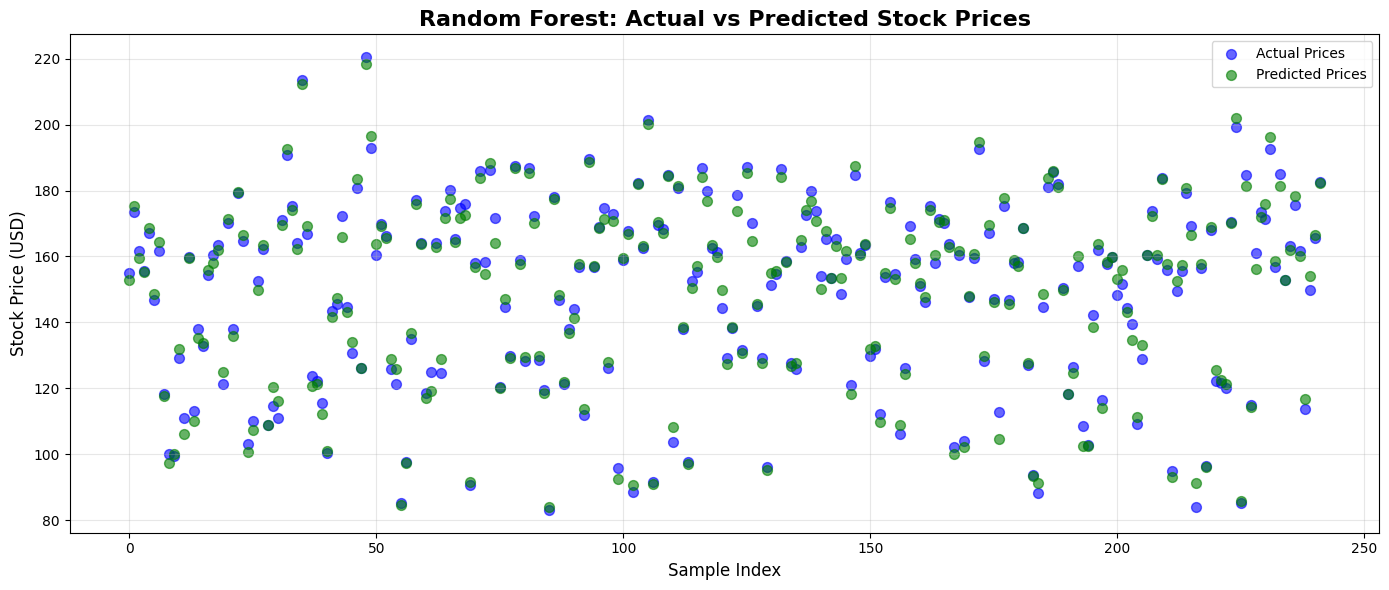


MODEL PERFORMANCE COMPARISON
Metric                    Linear Regression    Random Forest       
----------------------------------------------------------------------
R² Score                  0.9694               0.9925              
RMSE                      7.55                 2.46                
MAE                       5.76                 1.96                
MSE                       56.93                6.04                


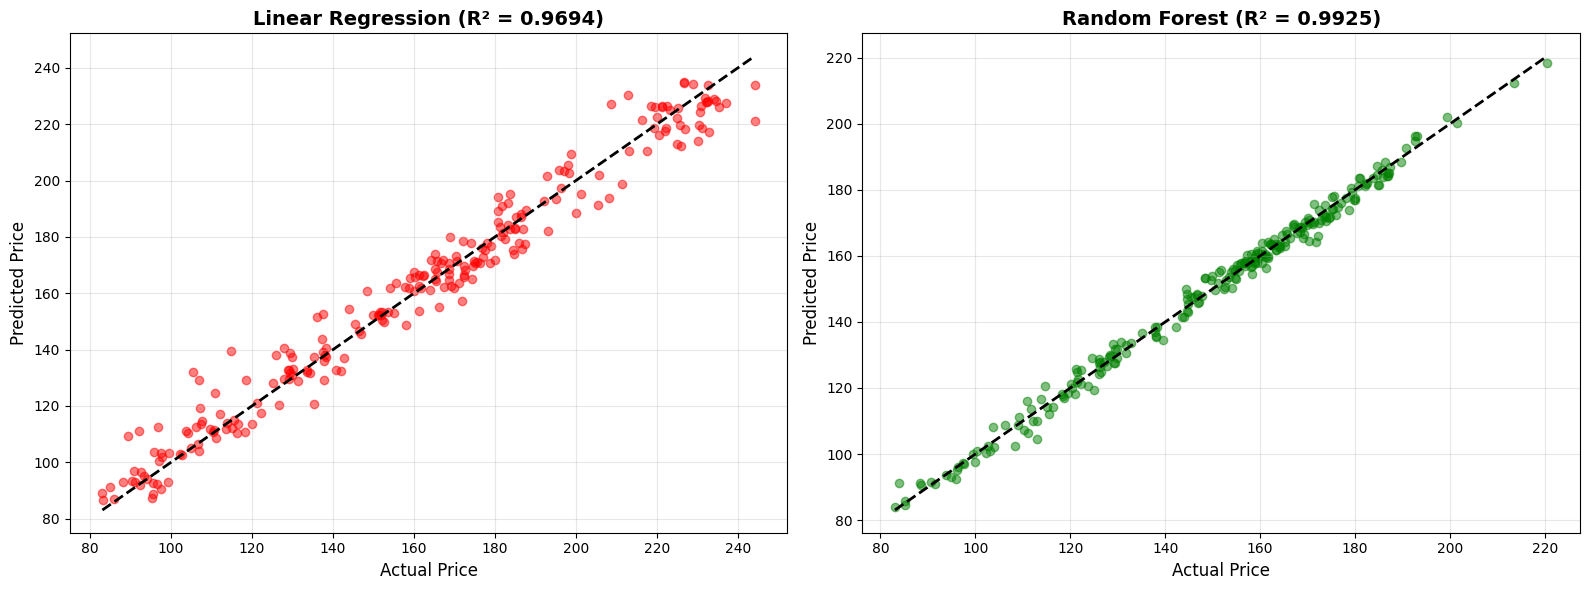


Conclusion:
Random Forest performs better than Linear Regression.
Improvement in R² score: 0.0231

TASK A COMPLETED SUCCESSFULLY


In [9]:
# -----------------------------------------------------------------------------
# g) RANDOM FOREST REGRESSOR AND COMPARISON
# -----------------------------------------------------------------------------
print("\n=== Task A(g): Random Forest Regressor ===")

# RE-DOWNLOAD DATA AND RE-CALCULATE INDICATORS TO ENSURE CONSISTENCY
# This addresses potential kernel state issues where amzn_data might be empty or missing columns

import yfinance as yf
print("Re-downloading Amazon stock data for Random Forest...")
amzn_data = yf.download('AMZN', start='2019-12-14', end='2024-12-14')
print(f"Data re-downloaded: {len(amzn_data)} rows")

# Simple Moving Average - 20 days (MA20)
amzn_data['MA20'] = amzn_data['Close'].rolling(window=20).mean()

# Exponential Moving Average - 20 days (EMA20)
amzn_data['EMA20'] = amzn_data['Close'].ewm(span=20, adjust=False).mean()

# Simple Moving Average - 50 days (MA50)
amzn_data['MA50'] = amzn_data['Close'].rolling(window=50).mean()

# Relative Strength Index - 14 days (RSI)
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

amzn_data['RSI'] = calculate_rsi(amzn_data['Close'])

# Remove rows with missing values after calculating all indicators
amzn_data = amzn_data.dropna()
print(f"Data after re-calculating indicators and dropping NA values: {len(amzn_data)} rows")


# Prepare features with all technical indicators
X_full = amzn_data[['MA20', 'EMA20', 'MA50', 'RSI']]
y_full = amzn_data['Close']

# Split data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)

print(f"Random Forest training set: {len(X_train_rf)} samples")
print(f"Random Forest testing set: {len(X_test_rf)} samples")

# Define Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
print("\nRandom Forest Regressor initialized with 100 trees")

# Train the model
rf_model.fit(X_train_rf, y_train_rf)
print("Random Forest model trained successfully")

# Make predictions
y_pred_rf = rf_model.predict(X_test_rf)
print("Predictions made on test data")

# Calculate accuracy metrics
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)

print(f"\nRandom Forest Model Performance:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Model Accuracy: {r2_rf*100:.2f}%")

# Visualize Random Forest predictions
plt.figure(figsize=(14, 6))
plt.scatter(range(len(y_test_rf)), y_test_rf, color='blue', label='Actual Prices', alpha=0.6, s=50)
plt.scatter(range(len(y_pred_rf)), y_pred_rf, color='green', label='Predicted Prices', alpha=0.6, s=50)
plt.title('Random Forest: Actual vs Predicted Stock Prices', fontsize=16, fontweight='bold')
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('rf_predictions.png', dpi=300)
plt.show()

# Model Comparison
print("\n" + "="*70)
print("MODEL PERFORMANCE COMPARISON")
print("="*70)
print(f"{'Metric':<25} {'Linear Regression':<20} {'Random Forest':<20}")
print("-"*70)
print(f"{'R² Score':<25} {r2_lr:<20.4f} {r2_rf:<20.4f}")
print(f"{'RMSE':<25} {rmse_lr:<20.2f} {rmse_rf:<20.2f}")
print(f"{'MAE':<25} {mae_lr:<20.2f} {mae_rf:<20.2f}")
print(f"{'MSE':<25} {mse_lr:<20.2f} {mse_rf:<20.2f}")
print("="*70)

# Comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Linear Regression
axes[0].scatter(y_test, y_pred_lr, alpha=0.5, color='red')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0].set_xlabel('Actual Price', fontsize=12)
axes[0].set_ylabel('Predicted Price', fontsize=12)
axes[0].set_title(f'Linear Regression (R² = {r2_lr:.4f})', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Random Forest
axes[1].scatter(y_test_rf, y_pred_rf, alpha=0.5, color='green')
axes[1].plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()], 'k--', lw=2)
axes[1].set_xlabel('Actual Price', fontsize=12)
axes[1].set_ylabel('Predicted Price', fontsize=12)
axes[1].set_title(f'Random Forest (R² = {r2_rf:.4f})', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300)
plt.show()

print("\nConclusion:")
if r2_rf > r2_lr:
    print("Random Forest performs better than Linear Regression.")
    print(f"Improvement in R² score: {(r2_rf - r2_lr):.4f}")
else:
    print("Linear Regression performs better than Random Forest.")
    print(f"Difference in R² score: {(r2_lr - r2_rf):.4f}")

print("\n" + "="*70)
print("TASK A COMPLETED SUCCESSFULLY")
print("="*70)
